# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

*Решение.* Будем предпологать, что алгоритмы независимы.
1. Случай $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$. Заметим, что в этом случае ошибка случается только в том случае, когда ошибаются одновременно хотя бы любые два из трех алгоритмов. Это достигается за счет выполнения неравенств 
$$ w_1 + w_2 > w_3, \; w_2 + w_3 > w_1, \; w_3 + w_1 > w_2 .$$
Такая ситуация реализуется, если ошибаются либо 2 из трех алгоритмов, либо все три одновременно. Поэтому вероятность ошибки $$P(\text{error}) = 3 p^2 (1-p) + p^3 = p^2 (3 - 2p)$$
2. Случай $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$. В этом случае, так как выполняется неравенство $ w_2 > w_1 + w_3 $, то окончательный ответ полностью зависит от ответа второго алгоритма $b_2(x)$. Поэтому композиция этих алгоритмов ошибается в том и только в том случае, когда ошибается второй алгоритм. Вероятность ошибки
$$P(\text{error}) = p$$

### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

*Решение.* На $n$-м шаге алгоритма найдем производную функции потерь по ответу алгоритма на $i$-м элементе:
$$ r_i = \frac{\partial{L(y_i, b(x_i))}}{\partial{b(x_i)}} = - \left( \frac{y_i}{b(x_i)} - \frac{1-y_i}{1-b(x_i)} \right) = \frac{b(x_i) - y_i}{b(x_i)(1-b(x_i))}$$
После этого находим коэффициент шага, исходя из условия наискорейшего спуска:
$$ \gamma_n = \underset{\gamma}{\arg\min} \sum_i L(y_i, b_{n-1}(y_i) - \gamma r_i)$$
После этого базовым алгоритмом на $n$-м шаге назначаем
$$b_n(y) = b_{n-1}(y) - \gamma_n \textbf{r}$$

### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

*Решение*. Следуя алгоритму AdaBoost, на $n$-й итерации получаем ошибку на данной итерации $err_n = \frac{w_j}{\sum_i w_i}$. По правилу обновления весов, к следующей итерации веса, кроме $j$-го не изменятся ($\sum_{i\neq j} w_i \sim \sum_{i\neq j} w_i$), при этом $j$-й вес обновится $w_j \sim w_j \exp{(\alpha_n)} = \left(\sum_i w_i \right) - w_j = \sum_{i\neq j} w_i$. Если теперь нормировать новые веса, чтобы в сумме получить $1$, то получим, что $w_j = \frac{1}{2}$.

## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def bagging(X, y, size, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.randint(0, len(y), size)
    sample_X, sample_y = X[indices], y[indices]
    return sample_X, sample_y

In [3]:
class RandomForest(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, max_depth=None, max_features="auto", criterion="gini", random_state=None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.random_state = random_state
        self.trees = []
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        for i in range(self.num_trees):
            seed = self.random_state + i if self.random_state else None
            X_sample, y_sample = bagging(X_train, y_train, len(y_train), random_state=seed)
            tree = sklearn.tree.DecisionTreeClassifier(criterion=self.criterion, 
                                                       max_depth=self.max_depth, 
                                                       max_features=self.max_features, 
                                                       random_state=seed)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        y_pred = np.zeros(X_test.shape[0])
        predictions = np.column_stack(tuple([tree.predict(X_test) for tree in self.trees]))
        for i in range(len(y_pred)):
            classes, counts = np.unique(predictions[i], return_counts=True)
            y_pred[i] = classes[np.argmax(counts)]
        return y_pred

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
columns = ('Class Alcohol Malic_acid Ash Alcalinity_of_ash Magnesium Total_phenols Flavanoids '
           'Nonflavanoid_phenols Proanthocyanins Color_intensity Hue '
           '"OD280/OD315_of_diluted_wines" Proline').split()
df.columns = columns
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,"""OD280/OD315_of_diluted_wines""",Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
X, y = df[columns[1:]].values, df[columns[0]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра num_trees. Видны ли следы переобучения?

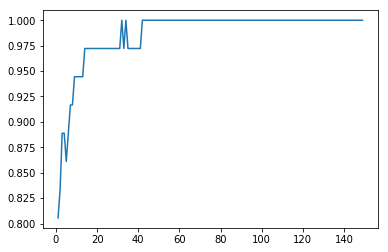

In [6]:
scores = []
interval = range(1, 150)
for num_trees in interval:
    forest = RandomForest(num_trees=num_trees, random_state=1)
    forest.fit(X_train, y_train)
    scores.append(forest.score(X_test, y_test))
plt.plot(interval, scores)
plt.show()

Как мы видим, следов переобучения не видно.

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

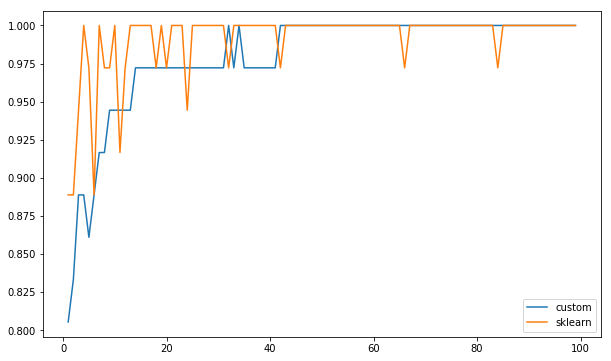

In [7]:
scores = []
scores1 = []
interval = range(1, 100)
for num_trees in interval:
    forest = RandomForest(num_trees=num_trees, random_state=1)
    forest.fit(X_train, y_train)
    scores.append(forest.score(X_test, y_test))
    forest1 = RandomForestClassifier(n_estimators=num_trees)
    forest1.fit(X_train, y_train)
    scores1.append(forest1.score(X_test, y_test))
plt.figure(figsize=(10, 6))
plt.plot(interval, scores, label="custom")
plt.plot(interval, scores1, label="sklearn")
plt.legend()
plt.show()

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

In [8]:
def bagging_subspace(X, y, size, max_features, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.randint(0, len(y), size)
    sample_X, sample_y = X[indices], y[indices]
    features = np.arange(X.shape[1])
    if type(max_features) == int:
        subspace = np.random.choice(features, max_features, replace=False)
    if type(max_features) == float:
        subspace = np.random.choice(features, int(max_features * len(features)), replace=False)
    if max_features == "sqrt":
        subspace = np.random.choice(features, int(len(features) ** 0.5), replace=False)
    if max_features == "log2":
        subspace = np.random.choice(features, int(np.log2(len(features))), replace=False)
    if max_features == None:
        subspace = features
    return sample_X[:, subspace], sample_y, subspace

class RandomForestSubspaces(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, max_depth=None, max_features="auto", criterion="gini", random_state=None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.random_state = random_state
        self.trees = []
        self.subspaces = []
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        for i in range(self.num_trees):
            seed = self.random_state + i if self.random_state else None
            X_sample, y_sample, subspace = bagging_subspace(X_train, y_train, len(y_train), 
                                                   self.max_features, random_state=seed)
            tree = sklearn.tree.DecisionTreeClassifier(criterion=self.criterion, 
                                                       max_depth=self.max_depth, 
                                                       random_state=seed)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
            self.subspaces.append(subspace)
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        y_pred = np.zeros(X_test.shape[0])
        predictions = np.column_stack(tuple([tree.predict(X_test[:, subspace]) 
                                             for tree, subspace in zip(self.trees, self.subspaces)]))
        for i in range(len(y_pred)):
            classes, counts = np.unique(predictions[i], return_counts=True)
            y_pred[i] = classes[np.argmax(counts)]
        return y_pred

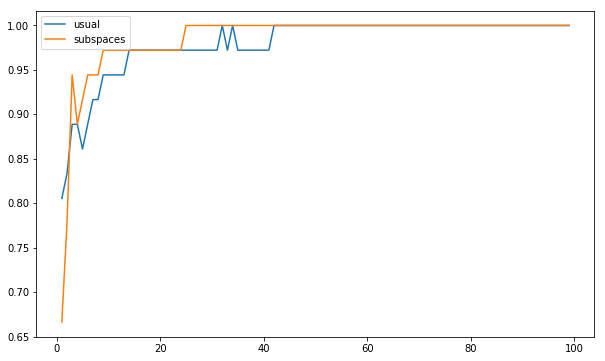

In [9]:
scores = []
scores1 = []
interval = range(1, 100)
for num_trees in interval:
    forest = RandomForest(num_trees=num_trees, random_state=1)
    forest.fit(X_train, y_train)
    scores.append(forest.score(X_test, y_test))
    forest1 = RandomForestSubspaces(num_trees=num_trees, max_features="sqrt", random_state=1)
    forest1.fit(X_train, y_train)
    scores1.append(forest1.score(X_test, y_test))
plt.figure(figsize=(10, 6))
plt.plot(interval, scores, label="usual")
plt.plot(interval, scores1, label="subspaces")
plt.legend()
plt.show()